#The Simpsons

In [1]:
# --- Configuración inicial ---
# Instalación de bibliotecas necesarias (ejecutar solo una vez en el entorno)
!pip install NRCLex==3.0.0
!pip install colorama
!pip install deep-translator
!pip install cufflinks plotly wordcloud seaborn
!pip install googletrans==4.0.0-rc1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 396.4/396.4 kB 12.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for NRCLex: filename=NRCLex-3.0.0-py3-none-any.whl size=43308 sha256=0a178f99bb43d610836706d1ca62660094546102a6b81e4a879aa678fc6212d7
  Stored in directory: /root/.cache/pip/wheels/d2/10/44/6abfb1234298806a145fd6bcaec8cbc712e88dd1cd6cb242fa
Successfully built NRCLex
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 23.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 5.7 MB/s eta 0:00:00
   ━

In [2]:
# --- Importación de bibliotecas ---
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import CountVectorizer
from PIL import Image
from nrclex import NRCLex
from colorama import Fore
from deep_translator import GoogleTranslator
import nltk
import re
import os

from googletrans import Translator



In [3]:
# Configuración para gráficos interactivos
import cufflinks as cf
cf.go_offline()
cf.set_config_file(world_readable=False)

In [4]:
# --- Descarga de recursos necesarios ---
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
stopwords_english = set(nltk.corpus.stopwords.words("english"))

# Descargar recursos necesarios de NLTK
nltk.download('punkt')  # Tokenizador
nltk.download('stopwords')  # Stopwords
nltk.download('wordnet')  # Lemmatizador
nltk.download('punkt_tab')
stop = stopwords.words("english")

# Asegurar que los recursos de NLTK se encuentren disponibles
nltk_data_path = '/content/nltk_data'
os.makedirs(nltk_data_path, exist_ok=True)
nltk.data.path.append(nltk_data_path)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [5]:
# --- Montaje de Google Drive ---
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
# --- Carga del dataset ---
ruta_dataset = '/content/drive/My Drive/simpsons_script_lines.csv'
df = pd.read_csv(ruta_dataset)
df.dropna(how='all', inplace=True)
df = df.dropna(subset=['word_count'])

<ipython-input-6-f4a466b24d16>:3: DtypeWarning:

Columns (4,5,6) have mixed types. Specify dtype option on import or set low_memory=False.



In [ ]:
# Conversión de tipos de datos
df['word_count'] = df['word_count'].astype(float).astype(int)


In [ ]:
# --- Función para traducción ---
def translate_to_spanish(text):
    """Traduce texto del inglés al español utilizando Google Translator."""
    try:
        return GoogleTranslator(source='en', target='es').translate(text)
    except Exception as e:
        print(f"Error al traducir: {e}")
        return text  # Retorna el texto original en caso de error

# Traducción de columnas relevantes
df['normalized_text_es'] = df['normalized_text'].apply(translate_to_spanish)
df['raw_character_text_es'] = df['raw_character_text'].apply(translate_to_spanish)

# Guardado del dataset traducido
ruta_guardado = '/content/drive/My Drive/simpsons_script_lines_translated.csv'
df.to_csv(ruta_guardado, index=False)
print(f"Traducción completada y guardada en: {ruta_guardado}")


In [7]:
def preprocess_text(column):
    """Preprocesa el texto eliminando caracteres no alfabéticos, stopwords y realizando lematización."""
    processed_text = []
    lemmatizer = nltk.WordNetLemmatizer()

    for text in column:
        # Asegurarse de que el texto sea una cadena
        if not isinstance(text, str):
            text = str(text) if text is not None else ""

        text = re.sub(r"[^a-zA-Z]", " ", text).lower()  # Solo caracteres alfabéticos y minúsculas
        tokens = nltk.word_tokenize(text)
        tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stopwords_english]
        processed_text.append(" ".join(tokens))

    return processed_text

# Ejemplo: Asegurarse de que la columna exista y contenga datos válidos
if 'normalized_text' in df.columns:
    df["normalized_text_new"] = preprocess_text(df['normalized_text'])
else:
    raise KeyError("La columna 'normalized_text' no existe en el DataFrame.")

In [8]:
# --- Separación de diálogos por personajes ---
characters = {'Homer': 2, 'Bart': 8, 'Marge': 1, 'Lisa': 9}
dialogues = {name: [] for name in characters.keys()}

for _, row in df.iterrows():
    for name, char_id in characters.items():
        if row['character_id'] == char_id:
            dialogues[name].append(row['normalized_text_new'])


In [9]:
# --- Limpieza de texto para cada personaje ---
def clean_text(text_list):
    """Elimina stopwords adicionales y ajusta el formato del texto."""
    pat = r'\b(?:{})\b'.format('|'.join(stopwords_english))
    df_cleaned = pd.DataFrame(text_list, columns=['normalized_text_new']).dropna()
    df_cleaned["normalized_text_new"] = df_cleaned["normalized_text_new"].str.replace(pat, '', regex=True)
    return df_cleaned

cleaned_dialogues = {name: clean_text(dialogues[name]) for name in characters.keys()}


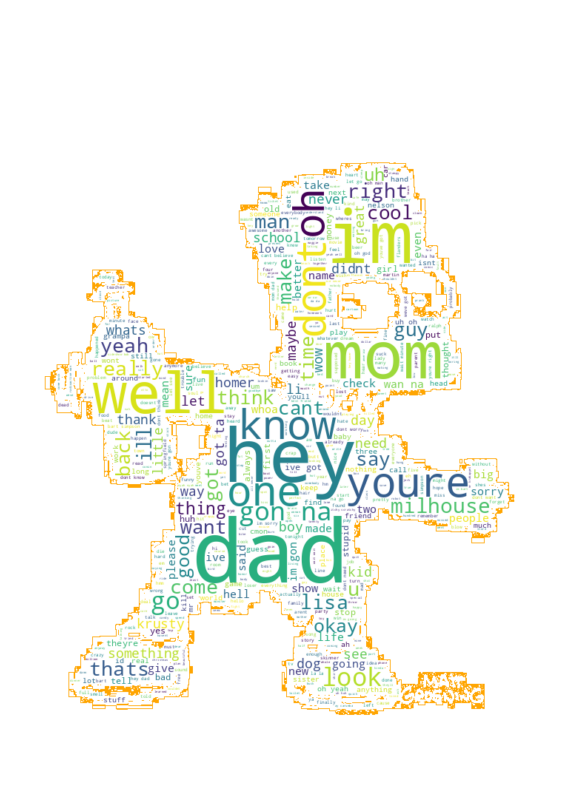

In [11]:
# --- Generación de nubes de palabras ---
def generate_wordcloud(data, mask_path=None, contour_color="black"):
    """Genera una nube de palabras con una máscara opcional."""
    mask = np.array(Image.open(mask_path)) if mask_path else None
    wordcloud = WordCloud(stopwords=STOPWORDS,
                          mask=mask, contour_width=1, contour_color=contour_color,
                          background_color="white", max_words=2000).generate(" ".join(data['normalized_text_new']))
    plt.figure(figsize=(10, 10))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()

generate_wordcloud(cleaned_dialogues['Bart'], mask_path='/content/bart.jpg', contour_color="orange")


Palabras originales y sus frecuencias:
dad: 1.0
hey: 0.6949924127465857
im: 0.6828528072837633
mom: 0.5538694992412747
well: 0.5341426403641881
youre: 0.48710166919575115
oh: 0.48103186646433993
dont: 0.4764795144157815
one: 0.47192716236722304
know: 0.47192716236722304
gon na: 0.4400606980273141
look: 0.40971168437025796
go: 0.38543247344461307
milhouse: 0.36418816388467373
thats: 0.34446130500758726
yeah: 0.34294385432473445
right: 0.34142640364188165
man: 0.33839150227617604
ill: 0.3277693474962064
come: 0.32473444613050073
lisa: 0.3186646433990895
u: 0.30804248861911987
really: 0.30197268588770865
want: 0.2898330804248862
say: 0.2867981790591806
guy: 0.2867981790591806
cant: 0.27921092564491656
time: 0.27769347496206376
got: 0.2716236722306525
think: 0.26858877086494687
make: 0.26403641881638845
back: 0.2564491654021244
cool: 0.2564491654021244
good: 0.24279210925644917
okay: 0.23975720789074356
uh: 0.2291350531107739
thing: 0.22610015174506828
something: 0.22306525037936267
see: 0

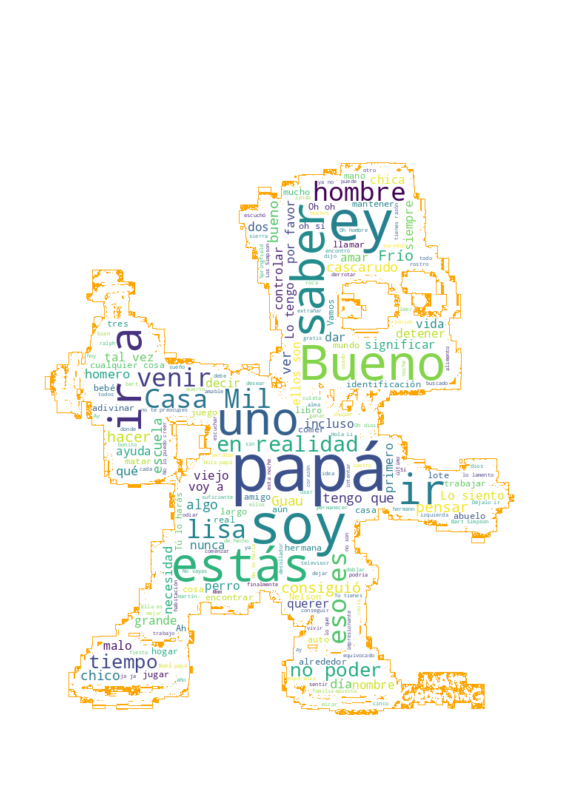

In [13]:
from wordcloud import WordCloud, STOPWORDS
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from deep_translator import GoogleTranslator  # Usar deep-translator

# --- Traducción de palabras ---
def translate_words(word_frequencies, source_lang='en', target_lang='es'):
    """Traduce palabras de un diccionario de frecuencias al idioma deseado."""
    translator = GoogleTranslator(source=source_lang, target=target_lang)
    translated_frequencies = {}
    for word, freq in word_frequencies.items():
        try:
            translated_word = translator.translate(word)
            translated_frequencies[translated_word] = freq
        except Exception as e:
            print(f"Error al traducir: {word} -> {e}")
            translated_frequencies[word] = freq  # Usa la palabra original si falla
    return translated_frequencies

# --- Generación de nubes de palabras ---
def generate_translated_wordcloud(data, mask_path=None, contour_color="black"):
    """Genera una nube de palabras traducidas al español."""
    mask = np.array(Image.open(mask_path)) if mask_path else None
    wordcloud = WordCloud(stopwords=STOPWORDS,
                          mask=mask, contour_width=1, contour_color=contour_color,
                          background_color="white", max_words=2000).generate(" ".join(data['normalized_text_new']))

    # Extraer palabras y frecuencias
    word_frequencies = wordcloud.words_
    print("Palabras originales y sus frecuencias:")
    for word, freq in word_frequencies.items():
        print(f"{word}: {freq}")

    # Traducir palabras
    translated_frequencies = translate_words(word_frequencies)
    print("\nPalabras traducidas y sus frecuencias:")
    for word, freq in translated_frequencies.items():
        print(f"{word}: {freq}")

    # Generar una nueva nube con las palabras traducidas
    translated_wordcloud = WordCloud(stopwords=STOPWORDS,
                                     mask=mask, contour_width=1, contour_color=contour_color,
                                     background_color="white").generate_from_frequencies(translated_frequencies)

    # Mostrar la nueva nube de palabras
    plt.figure(figsize=(10, 10))
    plt.imshow(translated_wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()

# Ejecución del código
generate_translated_wordcloud(cleaned_dialogues['Bart'], mask_path='/content/bart.jpg', contour_color="orange")


In [23]:
# --- Frecuencias de palabras, bigramas y trigramas ---
def get_top_n(corpus, n=10, ngram_range=(1, 1)):
    """Obtiene las palabras o n-gramas más frecuentes en un corpus."""
    vec = CountVectorizer(ngram_range=ngram_range).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    return sorted(words_freq, key=lambda x: x[1], reverse=True)[:n]

# --- Análisis de emociones con NRCLex ---
def analyze_emotions(corpus):
    """Analiza emociones en un corpus utilizando NRCLex."""
    text_object = NRCLex(" ".join(corpus))
    emotions = pd.DataFrame(list(text_object.raw_emotion_scores.items()), columns=["Emotion", "Count"])
    sns.barplot(data=emotions, x="Emotion", y="Count", palette="coolwarm")
    plt.title("Distribución de emociones")
    plt.show()


<ipython-input-30-caa5d3aa3a2e>:42: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




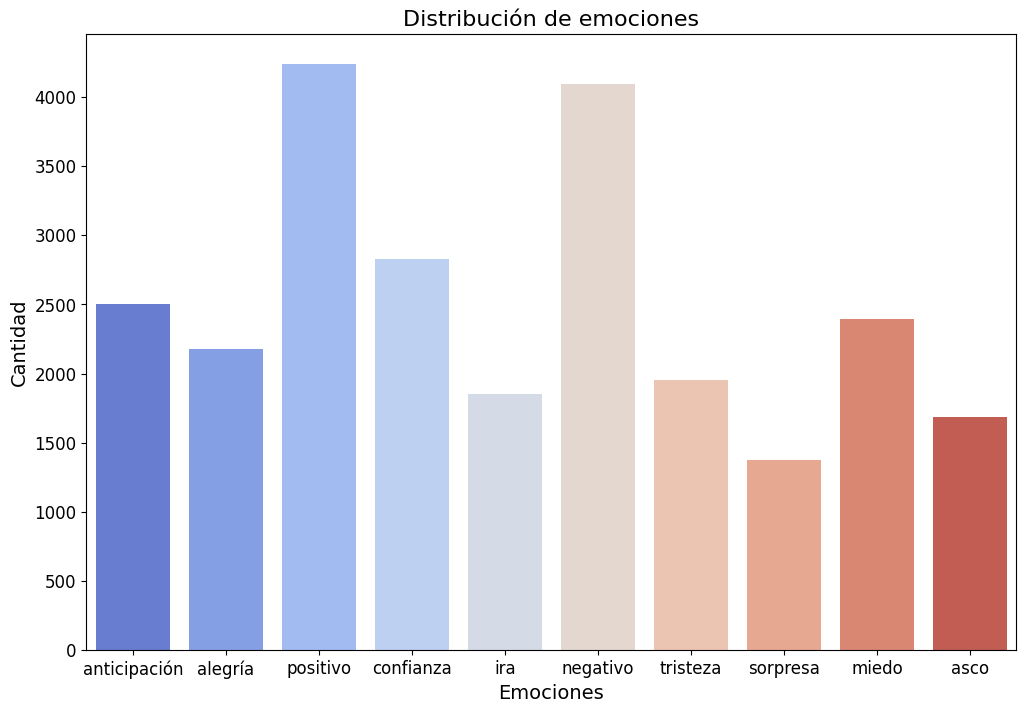

<ipython-input-30-caa5d3aa3a2e>:42: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




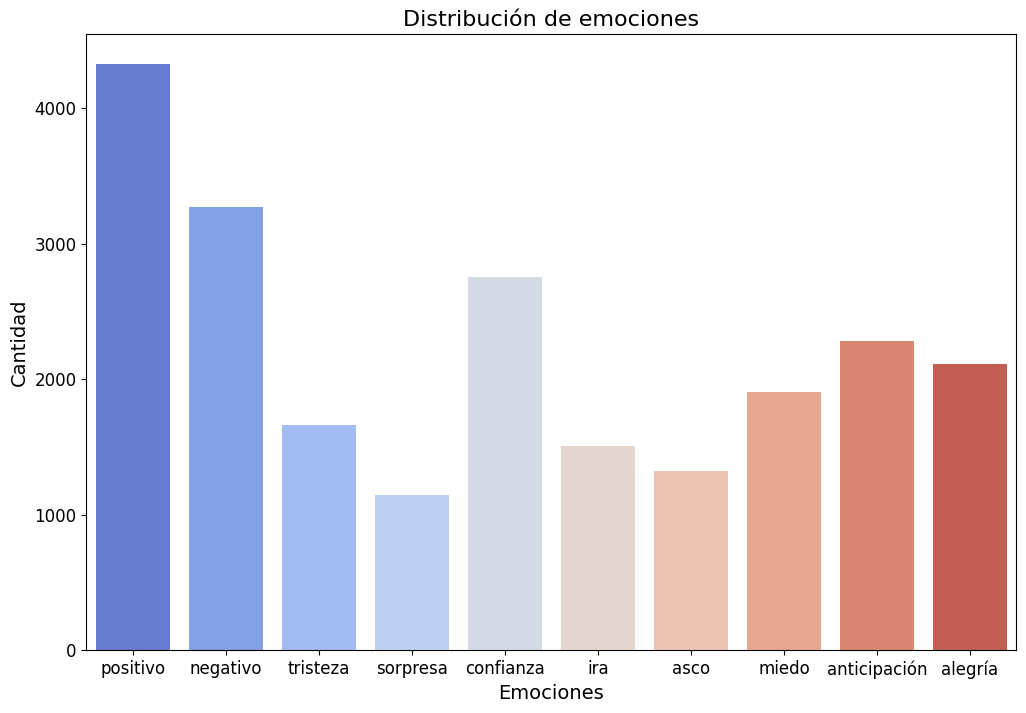

In [30]:
from nrclex import NRCLex
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Traducción de emociones al español ---
def translate_emotions(emotion_scores):
    """Traduce emociones al español."""
    emotion_translation = {
        "fear": "miedo",
        "anger": "ira",
        "anticipation": "anticipación",
        "trust": "confianza",
        "surprise": "sorpresa",
        "sadness": "tristeza",
        "disgust": "asco",
        "joy": "alegría",
        "positive": "positivo",
        "negative": "negativo"
    }
    translated_emotions = {
        emotion_translation[emotion]: count
        for emotion, count in emotion_scores.items()
        if emotion in emotion_translation
    }
    return translated_emotions

# --- Análisis de emociones con NRCLex ---
def analyze_emotions(corpus):
    """Analiza emociones en un corpus y las traduce al español."""
    text_object = NRCLex(" ".join(corpus))
    emotion_scores = text_object.raw_emotion_scores
    translated_emotions = translate_emotions(emotion_scores)

    # Crear DataFrame para graficar
    emotions_df = pd.DataFrame(
        list(translated_emotions.items()), columns=["Emoción", "Cantidad"]
    )

    # Configuración del gráfico
    plt.figure(figsize=(12, 8))  # Aumentar el tamaño del gráfico
    sns.barplot(data=emotions_df, x="Emoción", y="Cantidad", palette="coolwarm")
    plt.title("Distribución de emociones", fontsize=16)
    plt.xlabel("Emociones", fontsize=14)
    plt.ylabel("Cantidad", fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.show()

# Ejecución del análisis de emociones
analyze_emotions(cleaned_dialogues['Bart']['normalized_text_new'])

# Ejecución del análisis de emociones
analyze_emotions(cleaned_dialogues['Lisa']['normalized_text_new'])


<ipython-input-21-28ac41e3b2f2>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




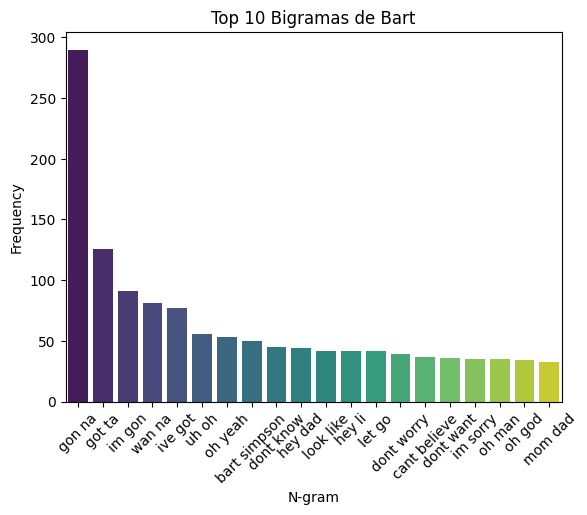

In [21]:
# --- Visualización de resultados ---
def plot_ngrams(ngrams, title):
    """Grafica los n-gramas más frecuentes."""
    df_ngrams = pd.DataFrame(ngrams, columns=["N-gram", "Frequency"])
    sns.barplot(data=df_ngrams, x="N-gram", y="Frequency", palette="viridis")
    plt.xticks(rotation=45)
    plt.title(title)
    plt.show()

# Ejemplo: Top 10 bigramas para Bart
bigrams = get_top_n(cleaned_dialogues['Bart']['normalized_text_new'], n=20, ngram_range=(2, 2))
plot_ngrams(bigrams, "Top 10 Bigramas de Bart")

<ipython-input-22-d914cae6c81e>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




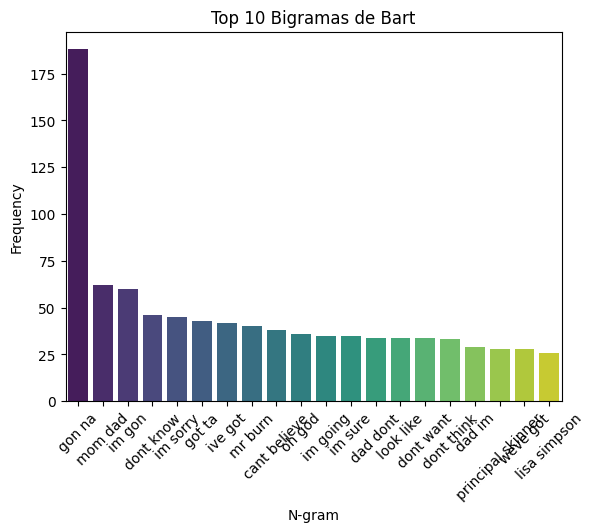

In [22]:
# --- Visualización de resultados ---
def plot_ngrams(ngrams, title):
    """Grafica los n-gramas más frecuentes."""
    df_ngrams = pd.DataFrame(ngrams, columns=["N-gram", "Frequency"])
    sns.barplot(data=df_ngrams, x="N-gram", y="Frequency", palette="viridis")
    plt.xticks(rotation=45)
    plt.title(title)
    plt.show()

# Ejemplo: Top 10 bigramas para Bart
bigrams = get_top_n(cleaned_dialogues['Lisa']['normalized_text_new'], n=20, ngram_range=(2, 2))
plot_ngrams(bigrams, "Top 10 Bigramas de Bart")